In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [86]:
import numpy as np
import scipy.stats as sts
import pandas as pd

In [87]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [88]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [89]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [90]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [91]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [92]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [93]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [94]:
# Print first row and values of datasets to get an understanding of the data
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1592dfa7188>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0}

In [95]:
# Print first row and values of datasets to get an understanding of the data
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1592dfaa908>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [96]:
# View entire datasets to get understanding of data
results = session.query(Measurement.id, Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs).all()
results

[(1, '2010-01-01', 'USC00519397', 0.08, 65.0),
 (2, '2010-01-02', 'USC00519397', 0.0, 63.0),
 (3, '2010-01-03', 'USC00519397', 0.0, 74.0),
 (4, '2010-01-04', 'USC00519397', 0.0, 76.0),
 (5, '2010-01-06', 'USC00519397', None, 73.0),
 (6, '2010-01-07', 'USC00519397', 0.06, 70.0),
 (7, '2010-01-08', 'USC00519397', 0.0, 64.0),
 (8, '2010-01-09', 'USC00519397', 0.0, 68.0),
 (9, '2010-01-10', 'USC00519397', 0.0, 73.0),
 (10, '2010-01-11', 'USC00519397', 0.01, 64.0),
 (11, '2010-01-12', 'USC00519397', 0.0, 61.0),
 (12, '2010-01-14', 'USC00519397', 0.0, 66.0),
 (13, '2010-01-15', 'USC00519397', 0.0, 65.0),
 (14, '2010-01-16', 'USC00519397', 0.0, 68.0),
 (15, '2010-01-17', 'USC00519397', 0.0, 64.0),
 (16, '2010-01-18', 'USC00519397', 0.0, 72.0),
 (17, '2010-01-19', 'USC00519397', 0.0, 66.0),
 (18, '2010-01-20', 'USC00519397', 0.0, 66.0),
 (19, '2010-01-21', 'USC00519397', 0.0, 69.0),
 (20, '2010-01-22', 'USC00519397', 0.0, 67.0),
 (21, '2010-01-23', 'USC00519397', 0.0, 67.0),
 (22, '2010-01-24'

In [97]:
# View entire datasets to get understanding of data
results = session.query(Station.id, Station.name, Station.station, Station.latitude, Station.longitude, Station.elevation).all()
results

[(1, 'WAIKIKI 717.2, HI US', 'USC00519397', 21.2716, -157.8168, 3.0),
 (2, 'KANEOHE 838.1, HI US', 'USC00513117', 21.4234, -157.8015, 14.6),
 (3,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  21.5213,
  -157.8374,
  7.0),
 (4, 'PEARL CITY, HI US', 'USC00517948', 21.3934, -157.9751, 11.9),
 (5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 21.4992, -158.0111, 306.6),
 (6,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  'USC00519523',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'WAIHEE 837.5, HI US',
  'USC00519281',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'HONOLULU OBSERVATORY 702.2, HI US',
  'USC00511918',
  21.3152,
  -157.9992,
  0.9),
 (9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [98]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [99]:
# Perform a query to retrieve the data and precipitation scores
precipitation_last12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
precipitation_last12

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [100]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_last12)
precipitation_df.set_index('date', inplace=True)
precipitation_df

prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2223 rows x 1 columns]

In [101]:
# Sort the dataframe by date
precipitation_df.sort_index(inplace=True)
precipitation_df

prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24   NaN
2016-08-24  1.22
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2223 rows x 1 columns]

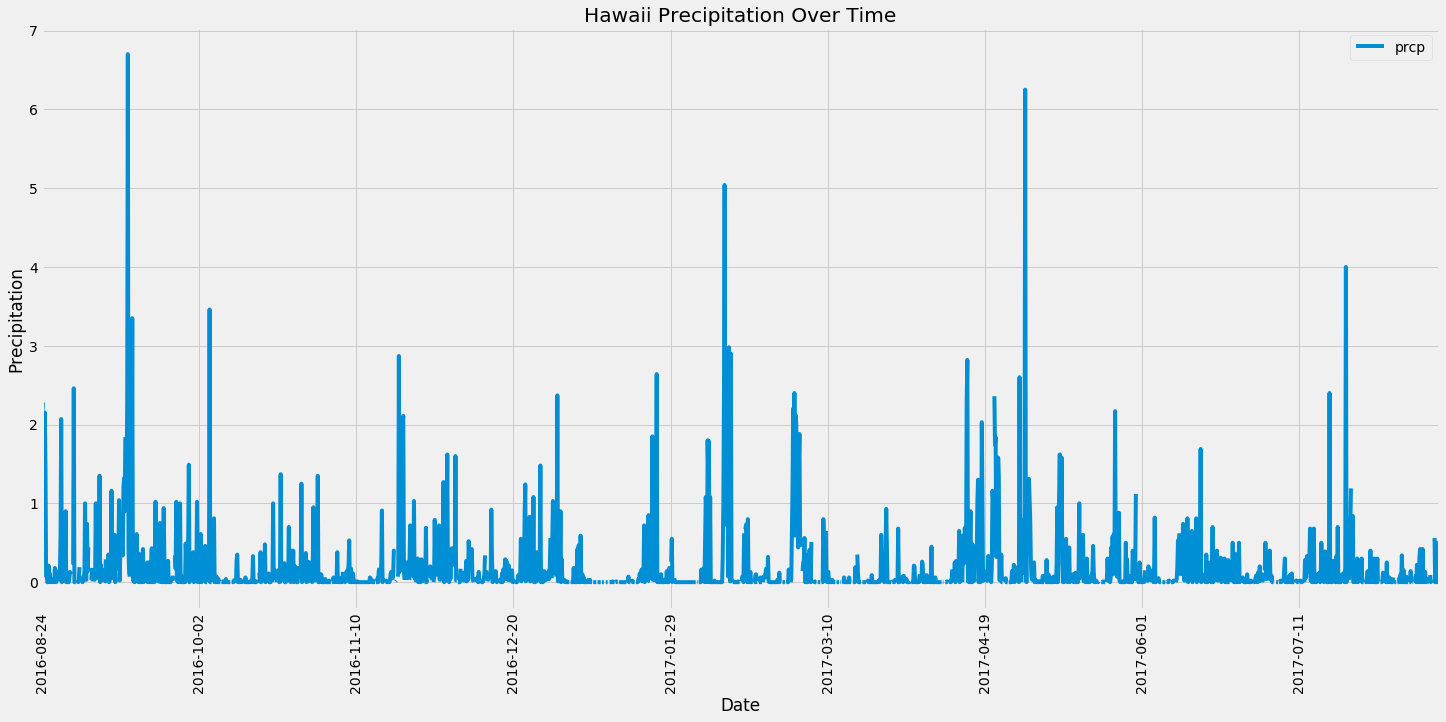

In [169]:
# Use Pandas Plotting with Matplotlib to plot the data

#precipitation_df.plot.hist(bins = 12)
precipitation_df.plot(kind="line", figsize=(20,10))
plt.xticks(rotation="vertical")
plt.tight_layout()

plt.title("Hawaii Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.show()

![precipitation](Images/precipitation.png)

In [103]:
# Use Pandas to calcualte the summary statistics for the precipitation data

mean_numpy = np.mean(precipitation_df['prcp'])
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(precipitation_df['prcp'])
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(precipitation_df['prcp'])
print(f"The mode temperature at the LAX airport is {mode_scipy}")


sd_numpy = np.std(precipitation_df['prcp'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")


The mean temperature at the LAX airport is 0.1764615384615378
The median temperature at the LAX airport is nan
The mode temperature at the LAX airport is ModeResult(mode=array([0.]), count=array([873]))
The population standard deviation using the NumPy module is 0.46017413403228974
Roughly 68% of the data is between -0.284 and 0.637
Roughly 95% of the data is between -0.744 and 1.097
Roughly 99.7% of the data is between -1.204 and 1.557


C:\Users\josep\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


![describe](Images/describe.png)

In [104]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

9

In [164]:
################# need to figure out how to sort this code which works below #####################
sel = [Measurement.station,
      func.count(Measurement.tobs)]
active = session.query(*sel).group_by(Measurement.station).order_by(Measurement.tobs).all()

active

[('USC00519397', 2724),
 ('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00519523', 2669)]

In [124]:
active_stations = session.query(Measurement).group_by(Measurement.station).all()
active_stations

In [162]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station = session.query(Measurement.date, Measurement.station).group_by(Measurement.station).all()
station

[('2010-01-01', 'USC00511918'),
 ('2010-01-01', 'USC00513117'),
 ('2010-03-01', 'USC00514830'),
 ('2010-01-01', 'USC00516128'),
 ('2010-05-03', 'USC00517948'),
 ('2010-01-01', 'USC00518838'),
 ('2010-01-01', 'USC00519281'),
 ('2010-01-01', 'USC00519397'),
 ('2010-01-01', 'USC00519523')]

In [165]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [Measurement.station, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]
most_active_data = session.query(*sel).filter(Measurement.station == "USC00519281").all()
most_active_data

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

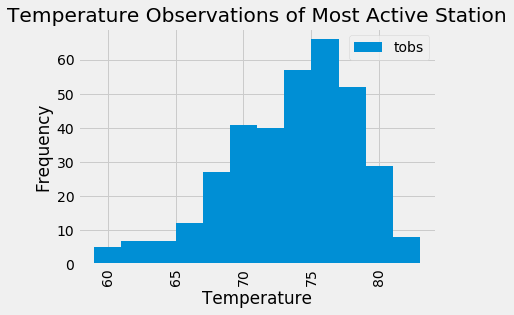

In [170]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and tobs data
tobs_last12 = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date > '2016-08-23').\
            filter(Measurement.station == "USC00519281").all()
#tobs_last12

# Save the query results as a Pandas DataFrame 
tobs_last12_df = pd.DataFrame(tobs_last12)


tobs_last12_df.plot.hist(bins = 12)
plt.xticks(rotation="vertical")
plt.tight_layout()

plt.title("Temperature Observations of Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

In [ ]:
###########################################################

In [ ]:
##########################################################

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


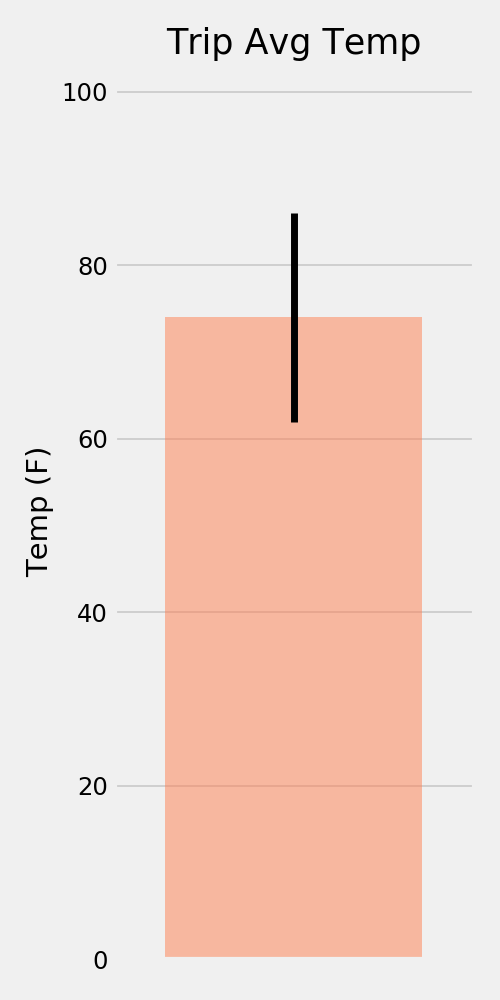

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


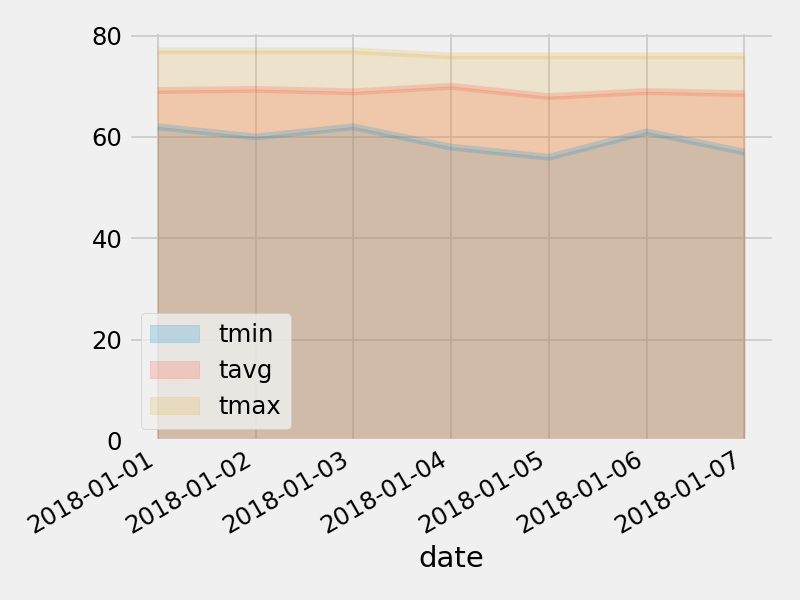

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
